import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

memanggil dataset

In [2]:
df = pd.read_csv('Housing.csv')

Deskripsi dataset

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


Visualisasi Data

jumlah rumah berdasarkan furnishing status

In [12]:
furnishingstatus = df.groupby('furnishingstatus').count()[['price']].sort_values(by='price', ascending=True).reset_index()
furnishingstatus = furnishingstatus.rename(columns={'price' : 'numberOfHouses'})

(array([0, 1, 2]),
 [Text(0, 0, 'furnished'),
  Text(1, 0, 'unfurnished'),
  Text(2, 0, 'semi-furnished')])

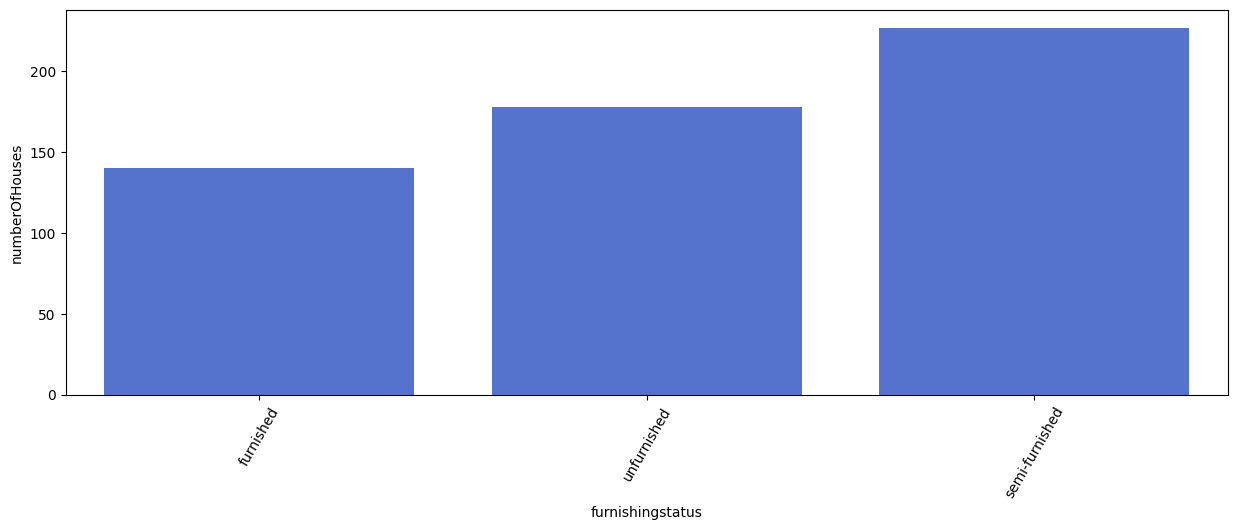

In [13]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=furnishingstatus['furnishingstatus'], y=furnishingstatus['numberOfHouses'], color='royalblue')
plt.xticks(rotation=60)

ukuran mesin

In [14]:
bedrooms = df.groupby('bedrooms').count()[['price']].sort_values(by='price').reset_index()
bedrooms = bedrooms.rename(columns={'price' : 'count'})

<Axes: xlabel='bedrooms', ylabel='count'>

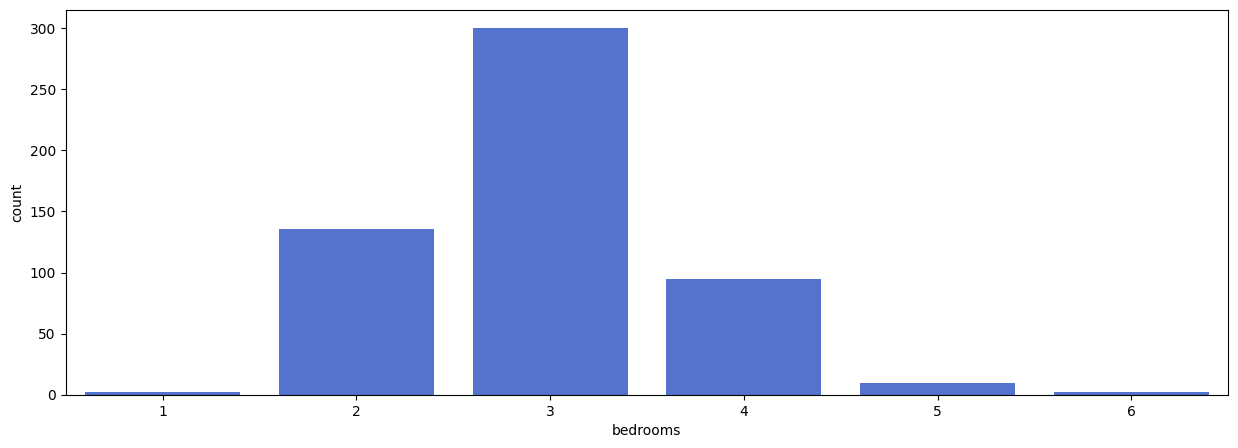

In [15]:
plt.figure(figsize=(15,5))
sns.barplot(x=bedrooms['bedrooms'], y=bedrooms['count'], color='royalblue')

distribusi harga rumah

c:\Users\afg-i\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x500 with 0 Axes>

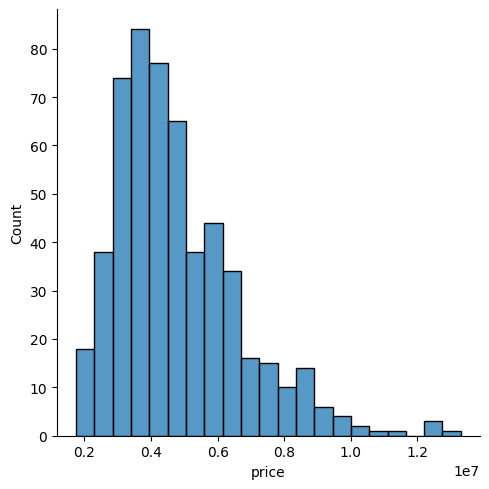

In [16]:
plt.figure(figsize=(15,5))
sns.displot(df['price'])

seleksi fitur

In [17]:
features = ['area', 'bedrooms', 'bathrooms', 'parking']
x = df[features]
y = df['price']
x.shape, y.shape

((545, 4), (545,))

split data training dan data testing

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(137,)

membuat model regresi linier

In [19]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)

In [20]:
score = lr.score(x_test, y_test)
print('akurasi model regresi linier = ', score)

akurasi model regresi linier =  0.5634089090845467


membuat inputan model regresi linier

In [21]:
#Area=8960. BedRooms=4, BathRooms=4, Parking=3
input_data = np.array([[8960, 4, 4, 3]])

prediction = lr.predict(input_data)
print('Estimasi harga rumah : ', prediction)

Estimasi harga rumah :  [10676969.68713347]


c:\Users\afg-i\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


save model

In [26]:
import pickle

filename = 'estimasi_rumah.sav'
pickle.dump(lr,open(filename, 'wb'))